In [1]:
import os
import numpy as np
import pandas as pd
import json
from tqdm.auto import tqdm

import matplotlib.pyplot as plt

In [2]:
cultural_results_file = "/lustre/nvwulf/scratch/pchitale/workspace/data/eccv/results/annotations_cultural.json"

# Load the cultural annotations
with open(cultural_results_file, 'r') as f:
    cultural_data = json.load(f)


vids = set(os.listdir("/lustre/nvwulf/scratch/pchitale/workspace/data/eccv/videos"))

clipInfo_dir = "/lustre/nvwulf/scratch/pchitale/workspace/data/eccv/jsons_step1"

In [3]:
rows = []

for i in tqdm(range(len(cultural_data['annotations']))):
    annotation = cultural_data['annotations'][i]
    videoName = annotation['videoFolder'].split('/')[-2]
    frame = annotation['videoInfo']['annotationFrame']+1
    clipInfo_path = os.path.join(clipInfo_dir, videoName + ".json")

    l_ga, l_gc, l_ghh, l_gh = [], [], [], []
    for g in annotation['groups']:
        co = g['cultural_output']
        ga, gc, ghh, gh = co['group_activity'], co['group_clothing'], co['group_handholding'], co['group_hugging']
        l_ga.extend(ga)
        l_gc.extend(gc)
        l_ghh.append(ghh)
        l_gh.append(gh)


    with open(clipInfo_path, 'r') as f:
        clipInfo = json.load(f)

    dset = clipInfo['dataset']
    density = clipInfo['density']
    city = clipInfo['city']
    country = clipInfo['country']
    source = clipInfo['source'].split('/')[-1]


    df_row = {
        "clip": videoName,
        "clip_index": int(videoName.split("_")[-1]),
        "frame": frame,
        "dataset": dset,
        "density": density,
        "city": city,
        "country": country,
        "activity": l_ga,
        "clothing": l_gc,
        "handholding": l_ghh,
        "hugging": l_gh,
        "source": source
        }
    
    rows.append(df_row)

  0%|          | 0/1620 [00:00<?, ?it/s]

In [4]:
country_to_region_globe = {
    "United Kingdom": "Anglo",
    "Belgium": "Germanic Europe",
    "Ireland": "Anglo",
    "France": "Latin Europe",
    "Germany": "Germanic Europe",
    "Portugal": "Latin Europe",
    "Spain": "Latin Europe",
    "Italy": "Latin Europe",
    "Switzerland": "Latin Europe",
    "Netherlands": "Germanic Europe",
    "Austria": "Germanic Europe",
    "Malta": "Latin Europe",
    "Denmark": "Nordic Europe",
    "Norway": "Nordic Europe",
    "Sweden": "Nordic Europe",
    "Finland": "Nordic Europe",
    "Iceland": "Nordic Europe",
    "Greece": "Eastern Europe",
    "Poland": "Eastern Europe",
    "Czech Republic": "Eastern Europe",
    "Slovakia": "Eastern Europe",
    "Hungary": "Eastern Europe",
    "Romania": "Latin Europe",
    "Belarus": "Eastern Europe",
    "Serbia": "Eastern Europe",
    "Moldova": "Latin Europe",
    "Estonia": "Nordic Europe",
    "Latvia": "Nordic Europe",
    "United States": "Anglo",
    "Canada": "Anglo",
    "Bermuda": "Other",
    "Mexico": "Latin America",
    "Brazil": "Latin America",
    "Chile": "Latin America",
    "Peru": "Latin America",
    "Uruguay": "Latin America",
    "Paraguay": "Latin America",
    "Colombia": "Latin America",
    "Costa Rica": "Latin America",
    "Venezuela": "Latin America",
    "Jamaica": "African",
    "Barbados": "African",
    "Antigua and Barbuda": "African",
    "Saint Lucia": "Other",
    "Kenya": "African",
    "Malawi": "African",
    "South Africa": "African",
    "Nigeria": "African",
    "Ghana": "African",
    "Senegal": "African",
    "Benin": "African",
    "Madagascar": "African",
    "Ethiopia": "African",
    "Eritrea": "African",
    "Mali": "African",
    "Gambia": "African",
    "United Arab Emirates": "Middle East",
    "Jordan": "Middle East",
    "Syria": "Middle East",
    "Iraq": "Middle East",
    "Lebanon": "Middle East",
    "Egypt": "Middle East",
    "Morocco": "Middle East",
    "Kuwait": "Middle East",
    "Israel": "Latin Europe",
    "Turkey": "Middle East",
    "Afghanistan": "South-East Asia",
    "India": "South-East Asia",
    "Pakistan": "South-East Asia",
    "Bangladesh": "South-East Asia",
    "Sri Lanka": "South-East Asia",
    "Nepal": "South-East Asia",
    "China": "Confucian Asia",
    "Japan": "Confucian Asia",
    "South Korea": "Confucian Asia",
    "Taiwan": "Confucian Asia",
    "Thailand": "South-East Asia",
    "Vietnam": "Confucian Asia",
    "Indonesia": "South-East Asia",
    "Singapore": "Confucian Asia",
    "Brunei": "South-East Asia",
    "Kazakhstan": "Eastern Europe",
    "Kyrgyzstan": "Eastern Europe",
    "Tajikistan": "South-East Asia",
    "Azerbaijan": "Middle East",
    "Georgia": "Eastern Europe",
    "Australia": "Anglo",
    "New Zealand": "Anglo",
    "Samoa": "South-East Asia",
    "Holy See": "Other"
}

In [7]:
df.country.nunique()

65

In [8]:
df.dataset.value_counts()

dataset
sekai    1263
ours      357
Name: count, dtype: int64

In [6]:
df = pd.DataFrame(rows)

df['country'].replace('USA', 'United States', inplace=True)
df['country'].replace('Korea', 'South Korea', inplace=True)
df['country'].replace('UAE', 'United Arab Emirates', inplace=True)
df['country'].replace('Czechia', 'Czech Republic', inplace=True)

df['globe_region'] = df['country'].map(country_to_region_globe)

/tmp/ipykernel_2385878/1042754960.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].replace('USA', 'United States', inplace=True)
/tmp/ipykernel_2385878/1042754960.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

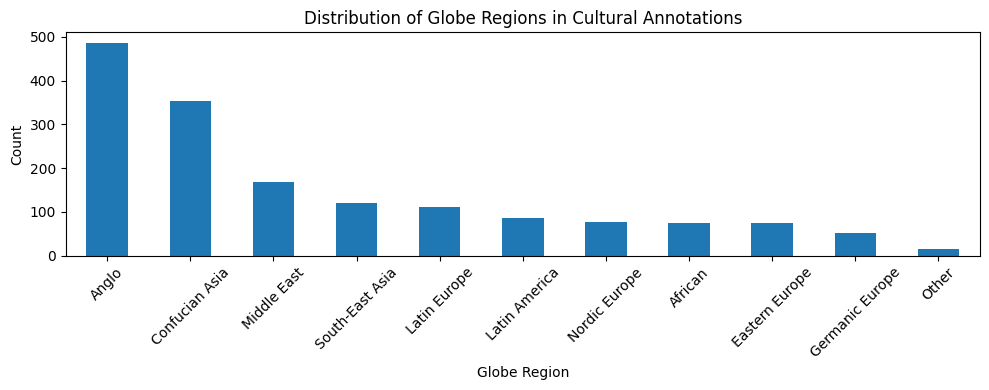

In [96]:
# plot distribution of globe regions
plt.figure(figsize=(10, 4))
df['globe_region'].value_counts().plot(kind='bar')
plt.title('Distribution of Globe Regions in Cultural Annotations')
plt.xlabel('Globe Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

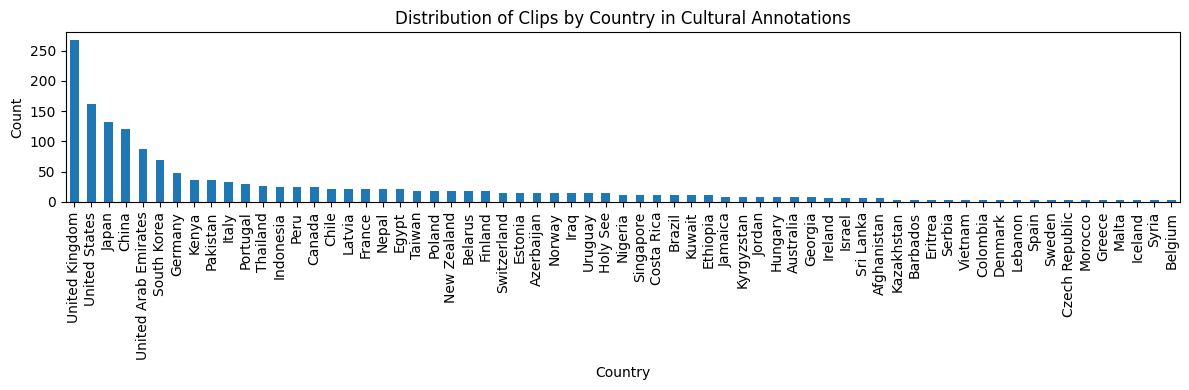

In [97]:
# plot distribution of clips by country
plt.figure(figsize=(12, 4))
df['country'].value_counts().plot(kind='bar')
plt.title('Distribution of Clips by Country in Cultural Annotations')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [98]:
# filter out duplicate activities and clothing in the lists for each clip
df['activity'] = df['activity'].apply(lambda x: list(set(x)))
df['clothing'] = df['clothing'].apply(lambda x: list(set(x)))

In [100]:
# find top 10 most common activities by GLOBE region
globe_region_activity_counts = {}
for region in df['globe_region'].unique():
    activities = df[df['globe_region'] == region]['activity'].explode()
    top_activities = activities.value_counts().head(10)
    globe_region_activity_counts[region] = top_activities

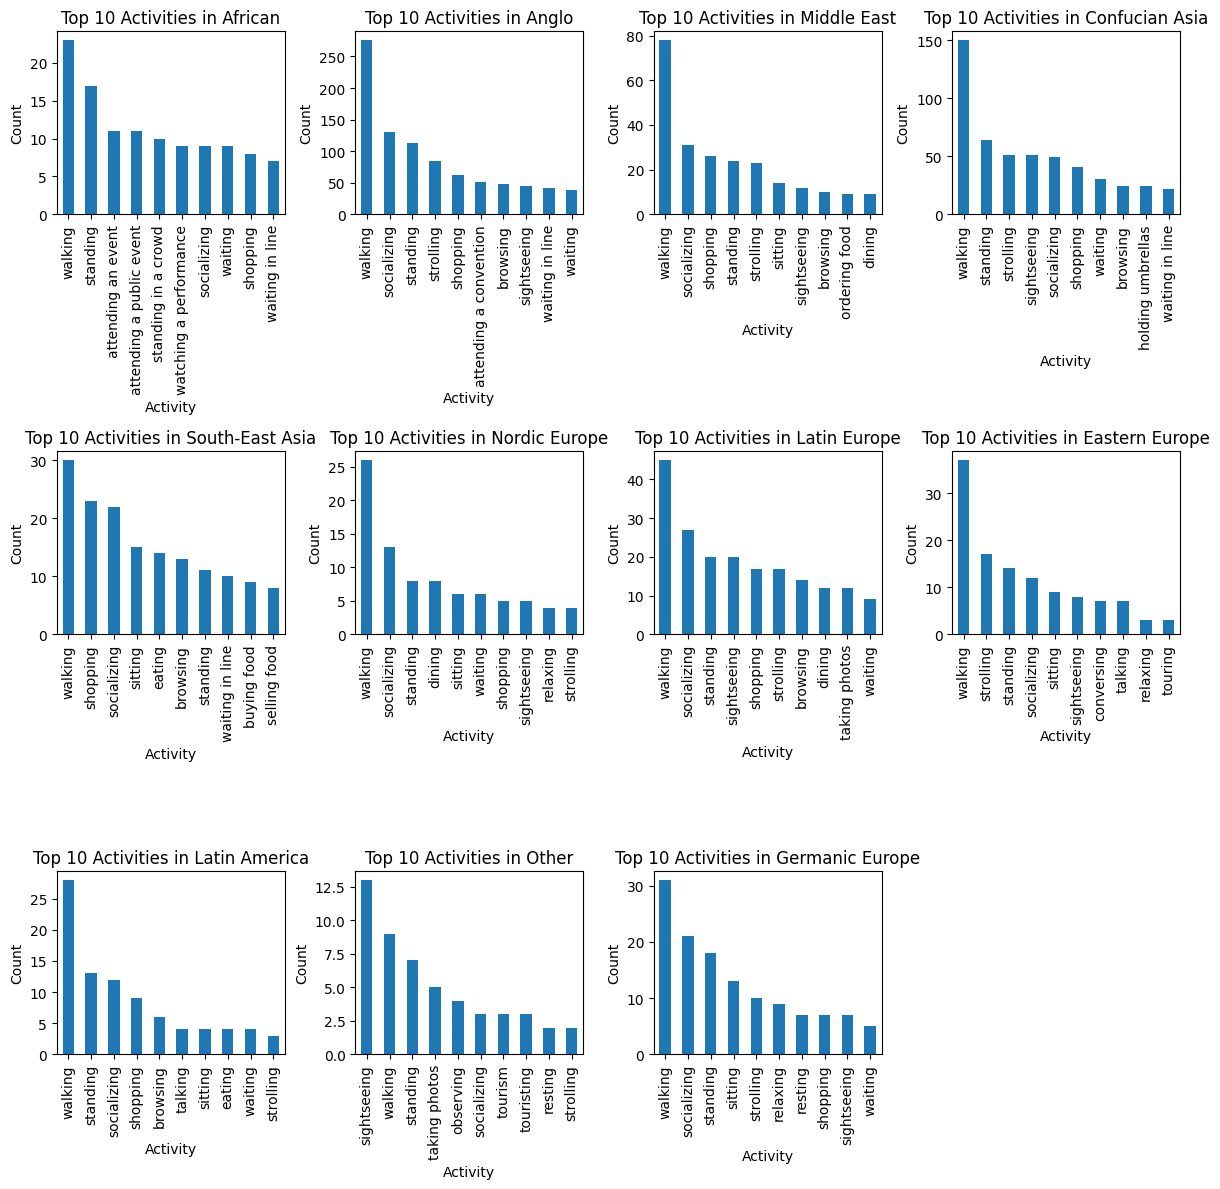

In [128]:
# plot top 10 activities by GLOBE region for Latin America, African, and South-East Asia
# regions_to_plot = ['Latin America', 'African', 'South-East Asia']
plt.figure(figsize=(12, 12))
for i, region in enumerate(globe_region_activity_counts.keys()):
    plt.subplot(3, 4, i+1)
    globe_region_activity_counts[region].plot(kind='bar')
    plt.title(f'Top 10 Activities in {region}')
    plt.xlabel('Activity')
    plt.ylabel('Count')
    # plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Now plot 